In [62]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue","blue"])
cmap_bold = ["darkorange", "c", "darkblue",'red']

In [51]:
def_frame_sucesso =  pd.read_csv("taxa_sucesso.csv",sep=',')

In [52]:
def_frame_sucesso_pos_2022= def_frame_sucesso[def_frame_sucesso['ano_base']==2022][['sigla','tsg','TSPG']]

In [53]:
X = def_frame_sucesso_pos_2022[['tsg','TSPG']].to_numpy() * 100
X=X.astype(int)

In [54]:
y = def_frame_sucesso_pos_2022['sigla'].to_list()

In [55]:
clf = neighbors.KNeighborsClassifier(20, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=20, weights='distance')

<Axes: xlabel='Taxa Grad', ylabel='Taxa Pós'>

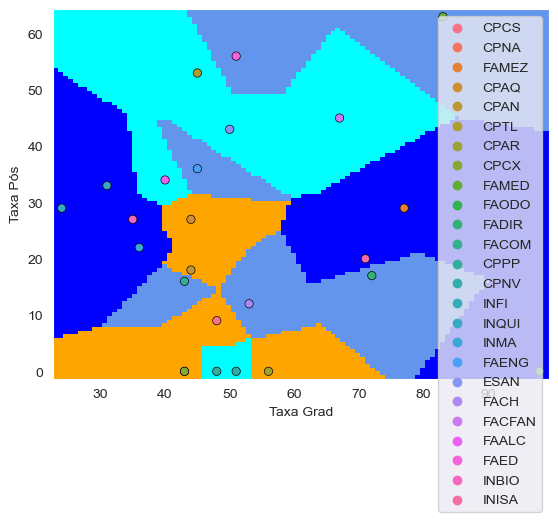

In [56]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,X,ax=ax,response_method='predict',plot_method='pcolormesh',xlabel="Taxa Grad",ylabel="Taxa Pós",        cmap=cmap_light,
    shading='auto'
)
sns.scatterplot(x=X[:,0],y=X[:,1],edgecolor='black',alpha=1.0
                # palette=cmap_bold
                , hue=y)


C:\Users\rafael.viana\AppData\Local\r-miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

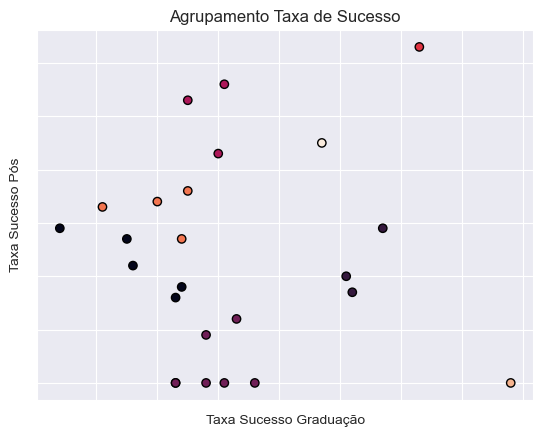

In [79]:

from sklearn.cluster import KMeans

est= KMeans(n_clusters=8, n_init="auto")
fig = plt.figure(figsize=(10, 8))

_,ax = plt.subplots()
est.fit(X)
labels = est.labels_

ax.scatter(X[:, 0], X[:, 1], c=labels.astype(float), edgecolor="k")


ax.set_xlabel("Taxa Sucesso Graduação")
ax.set_ylabel("Taxa Sucesso Pós")
ax.set_title("Agrupamento Taxa de Sucesso")

plt.show()

In [71]:
labels


array([6, 1, 2, 0, 6, 3, 1, 1, 5, 4, 2, 6, 1, 1, 0, 0, 0, 0, 3, 6, 7, 0,
       3, 0, 2])